# **Solving a image classification problem with CNN's** 



---



---





## **Concrete Crack Images Classifier**

### **Descripción del dataset:** 
Este dataset contiene imágenes de concreto intactas y con roturas con 40.000 imágenes en resolución 227x227 en canales RGB. Se escoge con el fin de diseñar una red neuronal convolucional que sea capaz de clasificar entre las dos clases existentes: Positivo (En caso de rotura) y Negativo (En caso contrario) .

---

Özgenel, Çağlar Fırat (2019), “Concrete Crack Images for Classification”, Mendeley Data, V2, doi: 10.17632/5y9wdsg2zt.2

Source: https://data.mendeley.com/datasets/5y9wdsg2zt/2

### **Modificación del dataset**
Con el propósito de cumplir el objetivo de la actividad y desarrollar una solución, se decide por reagrupar los datos en dos directorios distintos: *train* y *test*. Estos directorios cuentan con una distribución del 80% y 20% de los datos respectivamente.

Estas distribuciones de datos parten del nuevo número de imágenes las cuales se reducen a un total 3.000 imágenes Esta modificación se hace con el fin de poder montar en la nube bajo los requisitos disponibles (espacio, capacidad de subida de internet, etc) y desarrollar la actividad en Google Colaboratory.

Inicialmente se probó el desarrollo de la actividad en una máquina local, sin embargo, al trabajar en el preprocesamiento de los datos se obtienen problemas que suponen una exigencia al máximo de los recursos de la máquina, y esta posteriormente llega a un punto de crash (en términos informáticos).


In [ ]:
#@title  Importe de librerías{ display-mode: "form" }

import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### La función OyE_imagenes(ruta) cumple la función de obtener las imágenes del directorio dado y etiquetarlas según la clase.

#### Este etiquetado se hace a partir del nombre del directorio en el que se encuentran alojadas las imágenes y se le asigna un número entero a cada una de las clases, teniendo así que la clase 'Negativo' es 0 y 'Positivo' es 1.

In [ ]:
#@title  Función OyE_imagenes(ruta){ display-mode: "form" }

def OyE_imagenes(ruta): #Obtener y Etiquetar las imágenes según la ruta
    Imagenes = []
    Etiquetas = []  
    etiqueta = 0
    
    for etiquetas in os.listdir(ruta): 
        if etiquetas == 'Positive': 
            etiqueta = 1
        elif etiquetas == 'Negative':
            etiqueta = 0
        
        for imagenes in os.listdir(ruta+etiquetas): 
            imagen = cv2.imread(ruta+etiquetas+r'/'+imagenes) 
            imagen = cv2.resize(imagen,(227,227)) 
            Imagenes.append(imagen)
            Etiquetas.append(etiqueta)
    
    return Imagenes,Etiquetas #Retorna todas las imágenes del directorio con su respectiva etiqueta

In [ ]:
#@title  Preprocesamiento{ display-mode: "form" }


x_train, y_train = OyE_imagenes('concreto/train/') 
x_test, y_test = OyE_imagenes('concreto/test/')     

x_train = np.array(x_train) # Las listas se convierten en numpy arrays.
y_train = np.array(y_train)

x_test = np.array(x_test) 
y_test = np.array(y_test)

y_test = tf.keras.utils.to_categorical(y_test, dtype='int32')
y_train = tf.keras.utils.to_categorical(y_train, dtype='int32')

print("CONCRETE CRACK IMAGES:\n")
print("Número de Imágenes de Entrenamiento: "+str(x_train.shape[0]))
print("Número de Imágenes de Prueba: "+str(x_test.shape[0]))
print("\nImagenes Entrenamiento: "+str(x_train.shape))
print("Etiquetas Entrenamiento: "+str(y_train.shape))
print("\nImagenes Prueba: "+str(x_test.shape))
print("Etiquetas Prueba: "+str(y_test.shape))


CONCRETE CRACK IMAGES:

Número de Imágenes de Entrenamiento: 2400
Número de Imágenes de Prueba: 600

Imagenes Entrenamiento: (2400, 227, 227, 3)
Etiquetas Entrenamiento: (2400, 2)

Imagenes Prueba: (600, 227, 227, 3)
Etiquetas Prueba: (600, 2)


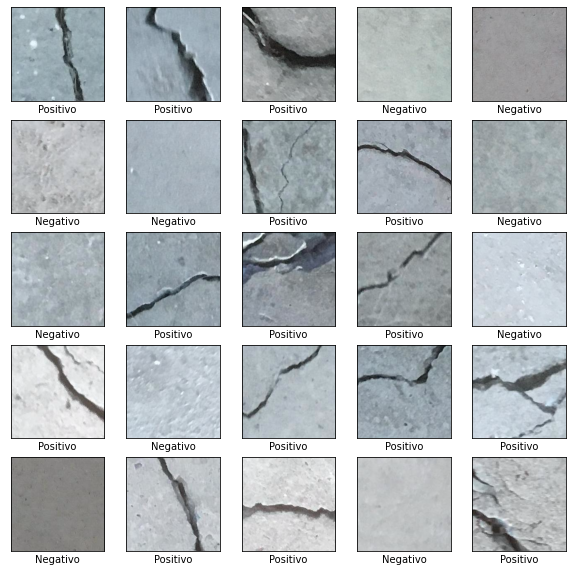

In [ ]:
#@title Visualización de una muestra aleatorea de las imágenes del dataset { display-mode: "form" }
class_names = ['Negativo','Positivo']
plt.figure(figsize=(10,10))
for i in range(25):
    rnd_number = np.random.randint(0,len(x_train))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[rnd_number])
    plt.xlabel(class_names[y_train[rnd_number,1]])

## Arquitectura de la Red Neuronal Convolucional

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu', kernel_initializer='glorot_normal', bias_initializer='he_normal', padding='same', input_shape=(227, 227, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((4, 4)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((3, 3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(220, kernel_initializer='glorot_normal', bias_initializer='he_uniform',  activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 227, 227, 64)      4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 227, 227, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 32)        0

### Compilación de la CNN

In [ ]:

model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9),
                metrics=['binary_accuracy'])

iterations = 25

history = model.fit(
  x_train, y_train,
  epochs=iterations,
  validation_split=0.2,
  verbose=False)     

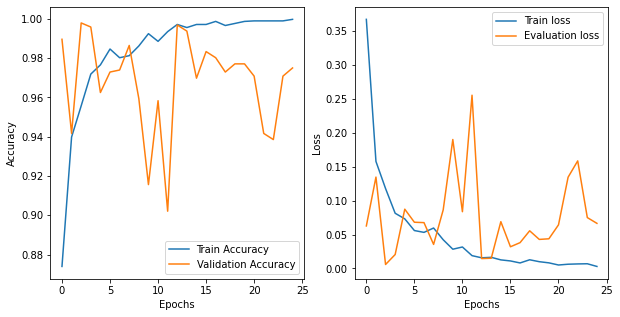

In [ ]:
#@title Comportamiento del entrenamiento de la CNN { display-mode: "form" }

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['binary_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_binary_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='Train loss');
ax.plot(history.history['val_loss'], label='Evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
#@title Evaluación del modelo { display-mode: "form" }

model.evaluate(x_test, y_test)

19/19 [==============================] - 0s 19ms/step - loss: 0.0828 - binary_accuracy: 0.9725


[0.0827903226017952, 0.9725000262260437]

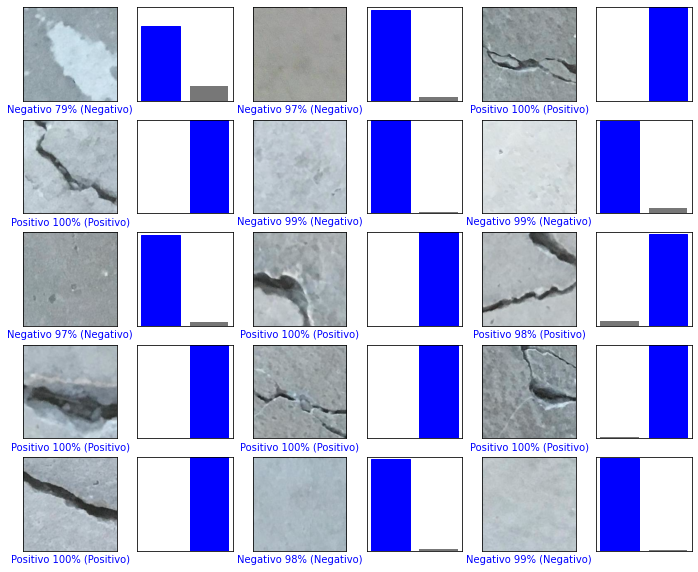

In [ ]:
#@title Predicción del modelo con imágenes aleatoreas { display-mode: "form" }


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(227, 227,3), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(2), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

predictions = model.predict(x_test) #PREDICCION

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    rnd_number = np.random.randint(0,len(x_test))
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(rnd_number, predictions, np.argmax(y_test ,axis=1), x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(rnd_number, predictions, np.argmax(y_test ,axis=1))

# Transfer Learning

In [ ]:
#@title **INCEPTION V3**

model_TL =  tf.keras.applications.InceptionV3(input_shape=(227,227,3),classes=2, weights='imagenet',classifier_activation="sigmoid", include_top=False)
model_TL.trainable = False
model_TL.summary()



Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 227, 227, 3) 0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 113, 113, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 113, 113, 32) 96          conv2d_2[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 113, 113, 32) 0           batch_normalization_2[0][0]      
_______________________________________________________________________________________

In [ ]:
#@title **INCEPTION V3 Con capas añadidas**

modelo_TL = tf.keras.Sequential([  #Añadirle a INCEPTION
  model_TL,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(220, kernel_initializer='glorot_uniform', bias_initializer='he_uniform',  activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(2, activation='sigmoid')
])

modelo_TL.summary()
print("number of layers to train: ", len(modelo_TL.trainable_variables))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 220)               450780    
_________________________________________________________________
dropout_1 (Dropout)          (None, 220)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 442       
Total params: 22,254,006
Trainable params: 451,222
Non-trainable params: 21,802,784
_________________________________________________________________
number of layers to train:  4


In [ ]:
#@title **Compilación INCEPTION V3**

modelo_TL.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9),
                metrics=['binary_accuracy'])

iterations = 25

history = modelo_TL.fit(
  x_train, y_train,
  epochs=iterations,
  validation_split=0.2,
  verbose=False)     

In [ ]:
#@title **Evaluación del modelo INCEPTION V3**

modelo_TL.evaluate(x_test, y_test)

19/19 [==============================] - 3s 95ms/step - loss: 0.1317 - binary_accuracy: 0.9608


[0.1317015141248703, 0.9608333110809326]

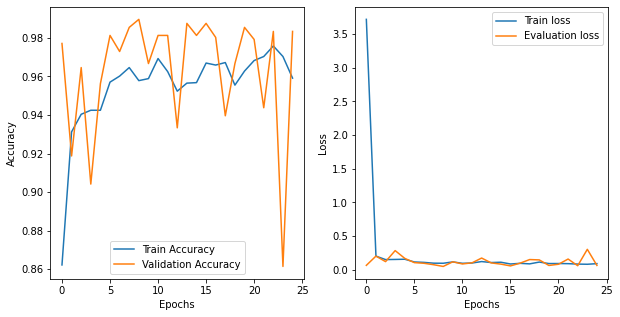

In [ ]:
#@title **Comportamiento de INCEPTION V3**

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['binary_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_binary_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='Train loss');
ax.plot(history.history['val_loss'], label='Evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

# CONCLUSIONES FINALES


---


1.   **Dataset**

Inicialmente se mencionó que para cumplir con el objetivo de la actividad, se realizó una modificación al dataset original pasando de 40.000 imágenes a 3.000. Esto con el fin de aprovechar los recursos disponibles en la nube y su procedimiento para realizarlo, en esto se incluye el peso del dataset, tiempo disponible de trabajo en COLAB, uso de GPU, entre otras, las cuales dificilmente pudiesen haber sido desarrolladas en máquina local.

Además, los datos se organizaron en directorios para *train* y *test* con el fin de accederlos facilmente y con ello, asignarles su etiqueta apropiada según el tipo de clase (Negativo y Positivo).

2.   **Arquitectura de la CNN**

Un aspecto importante al momento del diseño de la arquitectura es el reto que hay entre el equilibrio de evitar el sobre-aprendizaje y tener buenos resultados en la validación o prueba del modelo. La arquitectura presentada es el resultado de haber trabajado con varias estrategias para optimizar el sobre-aprendizaje y el costo y estabilidad del la red con la implementación del Dropout y la Normalización de batch e inicialización con distribución normal.

Se logra mantener un comportamiento entre el entrenamiento del modelo y la validación con presición elevada midiendo la presición binaria. Finalmente en la prueba se obitene una red convolucional de poco más de dos millones de parámetros y una precisión del 97.25%.



3.   **Transfer Learning**

Se escoge la red INCEPTION V3 y se entrenan nuevas capas fully connected debido al nuevo dataset el cual resulta ser muy pequeño en comparación al original.

Se observa que a pesar de la leve mejoría de la red para evitar el sobreaprendizaje en comparación a la red propuesta, INCEPTION V3 concluye una presición del 96.08%, ligeramente menor a la arquitectura propuesta.

**De esto se puede afirmar** que una arquitectura del estado del arte en redes convolucionales posee una gran eficacia y mantiene una buena estabilidad y optimización, tal como se observa en el comportamiento del aprendizaje. Sin embargo, debido a su objetivo principal de tratar con grandes datasets de imágenes, estas se convierten ineficientes al momento de tratar con datasets más pequeños, pues estos datasets se pueden tratar facilmente con arquitecturas más sencillas y menos costosas dando como resultado una mejor eficiencia. 
